# Đồ án cuối kì - Thực hành Nhập môn khoa học dữ liệu
### Nhóm: 16


### III. MÔ HÌNH HÓA DỮ LIỆU

Import các thư viện

In [1]:
import sys
sys.executable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

### 1. Đọc tập dữ liệu từ file

In [2]:
df = pd.read_csv('df.csv')
df.head()

,Continent,Country,Year,Age,Brain and nervous system cancers,Covid-19,Dengue,Drownings,Fires,HIV/AIDS,Leukaemia,Malaria,Natural disasters,Road traffic accidents,Self-inflicted injuries,Tuberculosis,Violence,War
0,Europe,Albania,2000-01-01,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,Europe,Albania,2000-01-01,1-4,0,0,0,12,1,0,3,0,0,0,0,2,0,0
2,Europe,Albania,2000-01-01,15-24,4,0,0,4,2,0,10,0,3,6,11,0,29,0
3,Europe,Albania,2000-01-01,25-34,6,0,0,5,0,0,9,0,1,13,20,0,34,0
4,Europe,Albania,2000-01-01,35-54,33,0,0,4,1,0,18,0,1,15,9,4,35,0


### 2. Xác định bài toán quan tâm trên tập dữ liệu

**Bài toán:** Dự đoán số người tử vong trong những năm tiếp theo.

**Ý nghĩa:** 
- Sức khoẻ: Số người tử vong trong một năm là thước đo về tình hình sức khoẻ cộng đồng trong một năm đó, ảnh hưởng bởi các yếu tố như dịch bệnh, thiên tai, chiến tranh, đói nghèo,... Số lượng người tử vong thể hiện được mức độ nghiêm trọng của các tác nhân này. Dự đoán số người tử vong trong tương lai, chúng ta sẽ biết tình hình đang được cải thiện hay xấu đi từ đó đưa ra những hành động phù hợp.
- Dân số: Số lượng tử vong là một trong những yếu tố chính tác động đến dân số. Dự đoán số người tử vong cho phép chúng ta dự đoán dân số, rất cần thiết cho công việc chỉ đạo, hoạch định chính sách, lập kế hoạch.


### 3. Lựa chọn mô hình và những đặc trưng quan trọng cho bài toán

#### Lựa chọn mô hình cho bài toán

* Nhóm lựa chọn hai mô hình để so sánh với nhau là mô hình hồi quy tuyến tính và mô hình hôi quy đa thức (bậc 2).
* Lý do chọn hai mô hình này: 
    - Nhìn vào biểu đồ phân tán (xem phần dưới): Sự phân tán của các điểm có vẻ nằm trên đường thẳng hoặc cong một chút của parabol.
    - Hai mô hình này đơn giản và trực quan, thích hợp với tập dữ liệu ít của bài toán.
    - Chọn hai mô hình để so sánh, đối chiếu với nhau.

#### Lựa chọn đặc trưng quan trọng cho bài toán

Những đặc trưng quan trọng cho bài toán mà chúng ta có thể chọn từ tập dữ liệu là: **Year**

Giải thích: Ta không chọn **Continent, Country, Age, Cause of death** vì chúng là những đặc trưng cố định và không thay đổi theo thời gian.

### 4. Tiền xử lý dữ liệu

Gom nhóm theo cột `Year`

In [3]:
years, number_of_deaths = [], []
for name, group in df.drop(['Continent', 'Country', 'Age'], axis=1).groupby('Year'):
    years.append(int(name.split('-')[0]))
    number_of_deaths.append(group.drop('Year', axis=1).sum().sum())
    
model_df = pd.DataFrame({'Year': years, 'Number of deaths': number_of_deaths})
model_df.head()

,Year,Number of deaths
0,2000,1256601
1,2001,1238378
2,2002,1308353
3,2003,1306450
4,2004,1218349


### 5. Khám phá sự phân tán dữ liệu

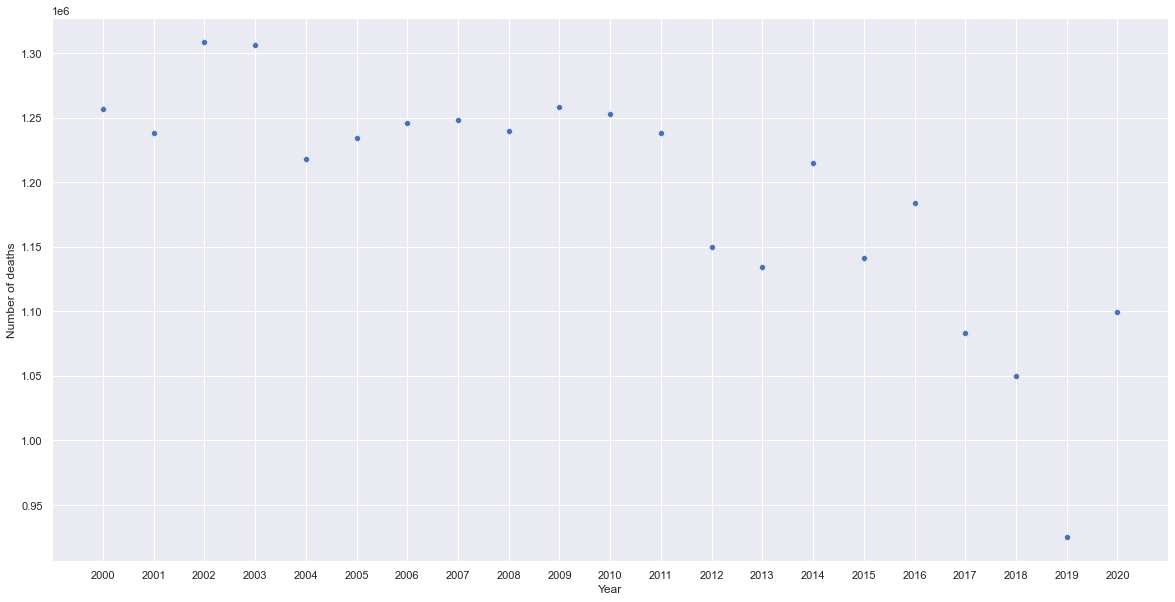

In [4]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x='Year', y='Number of deaths', data=model_df)
plt.xticks(years)
plt.show()

Sự phân tán của các điểm có vẻ nằm trên đường thẳng hoặc cong một chút của parabol.

### 6. Xác thực các siêu tham số của mô hình bằng tập kiểm định (validation set)

Vì chúng ta chỉ có duy nhất 1 đặc trưng là `Year` nên nó chính là siêu tham số duy nhất của mô hình.

Sử dụng validation set giúp chúng ta đánh giá hiệu quả của mô hình.

In [5]:
X = np.array(model_df['Year']).reshape(-1, 1)
y = np.array(model_df['Number of deaths']).reshape(-1, 1)

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size = 0.75)

### 7. Mô hình hóa dữ liệu

Nhóm lựa chọn hai mô hình để so sánh với nhau là mô hình hồi quy tuyến tính và mô hình hôi quy đa thức (bậc 2)

#### 7.1. Mô hình hồi quy tuyến tính

`y = w_0 + w_1*x`

Thực hiện mô hình:

In [6]:
# Khởi tạo mô hình
line_regr = LinearRegression()

# "Fit" mô hình vào dữ liệu
line_regr.fit(X_train, y_train)

# Xem giá trị của các tham số của mô hình
print('w_1: ', line_regr.coef_) # w_1
print('w_0: ', line_regr.intercept_) # w_0

w_1:  [[-13152.59896811]]
w_0:  [27635552.53736709]


Trực quan hóa mô hình tìm được

- Trên tập train

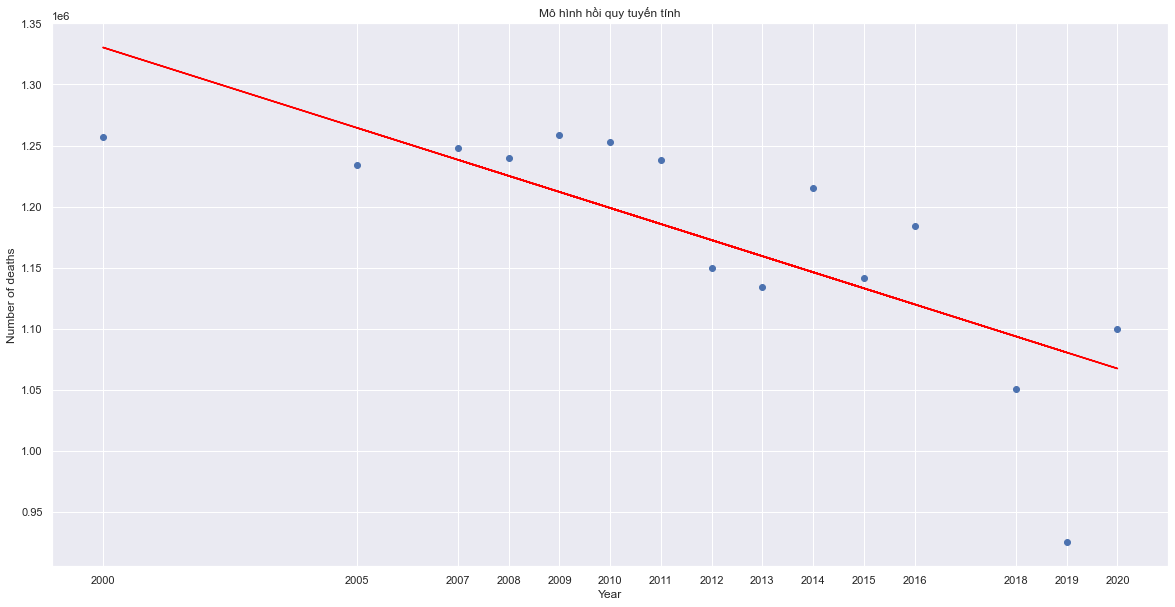

In [7]:
plt.figure(figsize = (20, 10))

plt.scatter(x=X_train, y=y_train)
plt.xticks(X_train)
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.title('Mô hình hồi quy tuyến tính')

plt.plot(X_train, line_regr.predict(X_train), color='red')

plt.show()

- Trên tập validation

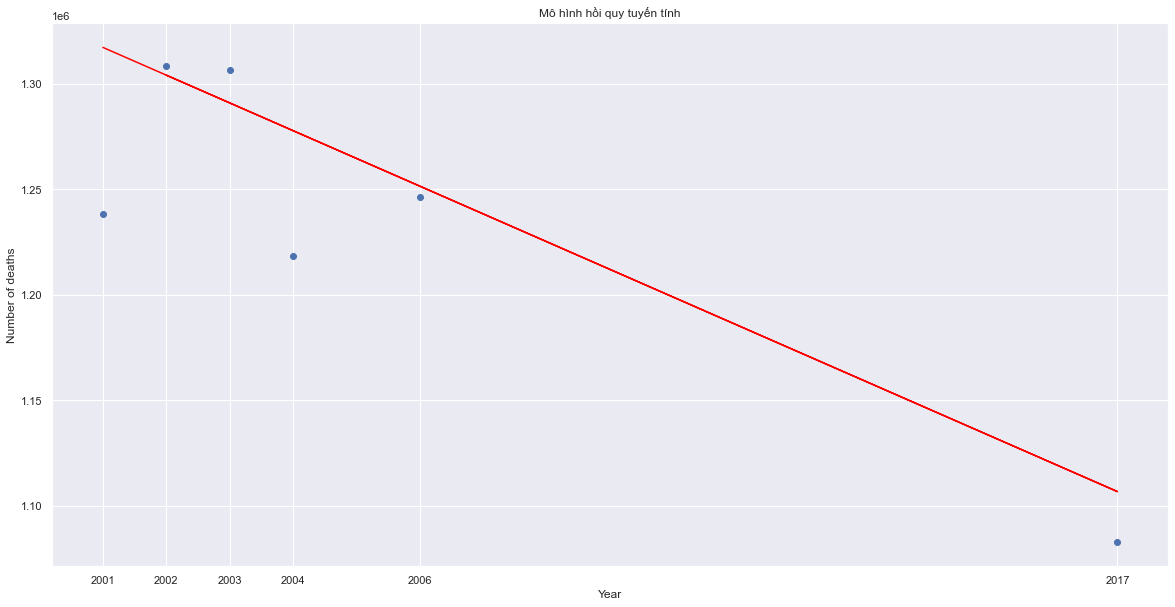

In [8]:
plt.figure(figsize = (20, 10))

plt.scatter(x=X_validation, y=y_validation)
plt.xticks(X_validation)
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.title('Mô hình hồi quy tuyến tính')
plt.plot(X_validation, line_regr.predict(X_validation), color='red')

plt.show()

Đánh giá hiệu suất mô hình bằng MSE-RMSE và R Square

In [9]:
# squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_validation, y_pred=line_regr.predict(X_validation)) # default=True
rmse = mean_squared_error(y_true=y_validation, y_pred=line_regr.predict(X_validation), squared=False)
print("MSE: ", mse)
print("RMSE: ", rmse)

# R Square
r_squared = line_regr.score(X_validation, y_validation)
print("\nR Square: ", r_squared)

MSE:  1764868915.3306053
RMSE:  42010.3429565935

R Square:  0.6882495600317167


#### 7.2 Mô hình hồi quy đa thức

Xác định đa thức: Ta chọn đa thức bậc 2 vì từ bước "Khám phá sự phân tán dữ liệu" ta thấy dữ liệu phân tán giống như một phần của đồ thị đa thức bậc 2. (Parabol bị úp ngược)

`y = w_0 + w_1*x + w_2*x^2`

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=False)

Tạo mới tập X_train và X_validation cho phù hợp với đa thức

In [11]:
poly_X_train = poly.fit_transform(X_train)
poly_X_validation = poly.fit_transform(X_validation)

Thực hiện mô hình

In [12]:
# Khởi tạo mô hình
poly_regr = LinearRegression()

# "Fit" mô hình vào dữ liệu
poly_regr.fit(poly_X_train, y_train)

# Xem giá trị của các tham số của mô hình
print('w_1, w_2: ', poly_regr.coef_)
print('w_0: ', poly_regr.intercept_)

w_1, w_2:  [[ 3.80685786e+06 -9.49882294e+02]]
w_0:  [-3.8129386e+09]


Trực quan hóa mô hình tìm được

- Trên tập train

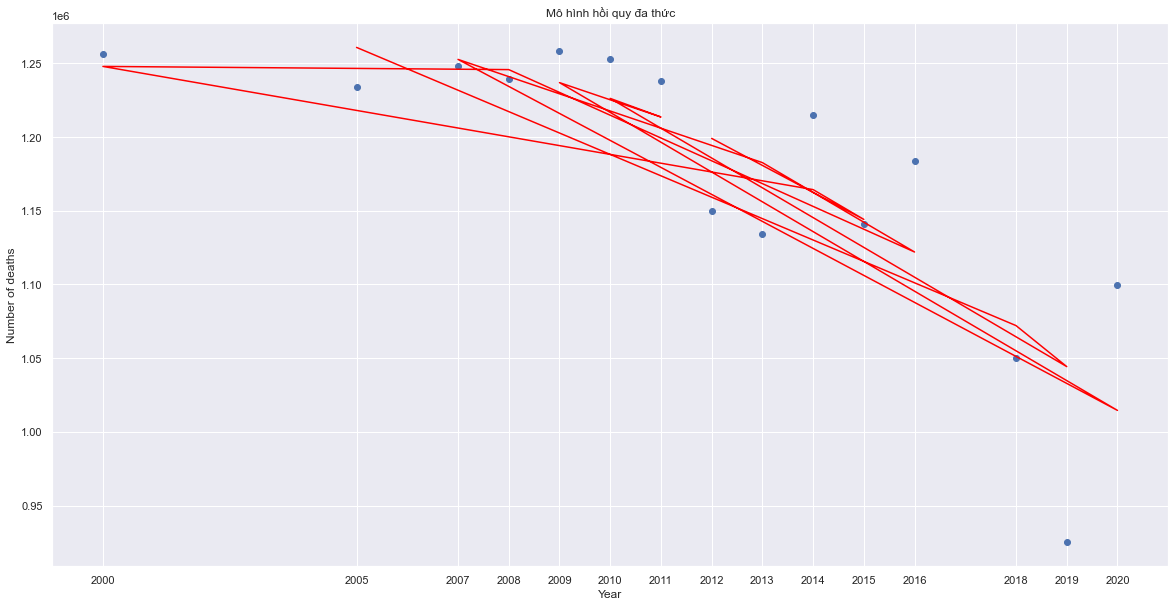

In [13]:
plt.figure(figsize = (20, 10))

plt.scatter(x=X_train, y=y_train)
plt.xticks(X_train)
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.title('Mô hình hồi quy đa thức')
plt.plot(X_train, poly_regr.predict(poly_X_train), color='red')

plt.show()

- Trên tập validation

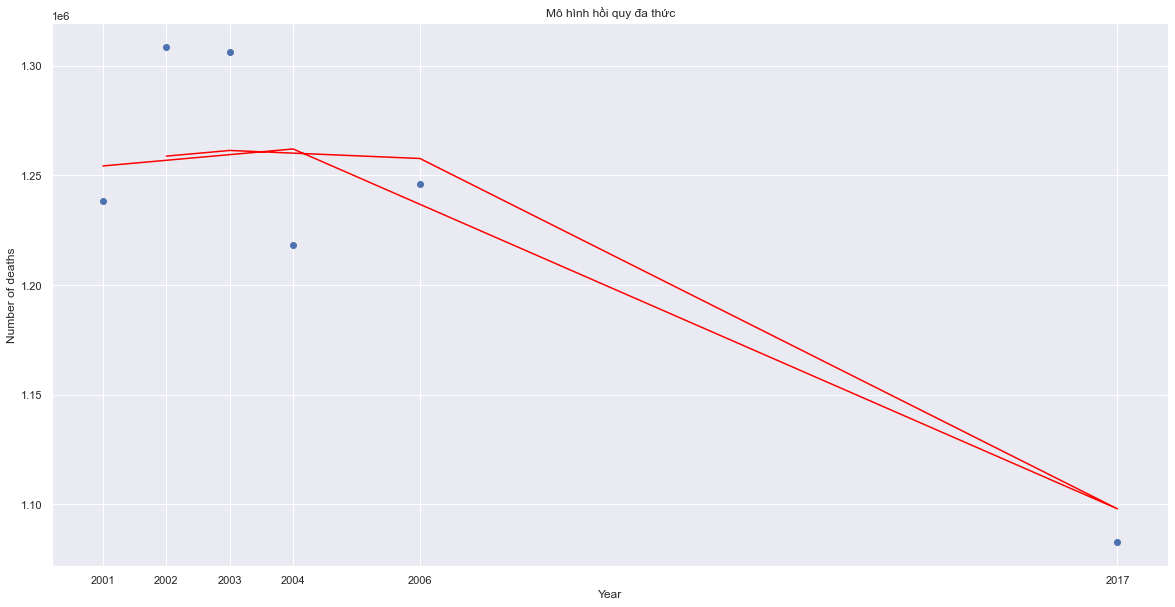

In [14]:
plt.figure(figsize = (20, 10))

plt.scatter(x=X_validation, y=y_validation)
plt.xticks(X_validation)
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.title('Mô hình hồi quy đa thức')
plt.plot(X_validation, poly_regr.predict(poly_X_validation), color='red')

plt.show()

Đánh giá hiệu suất mô hình bằng MSE-RMSE và R Square

In [15]:
# squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_validation, y_pred=poly_regr.predict(poly_X_validation)) # default=True
rmse = mean_squared_error(y_true=y_validation, y_pred=poly_regr.predict(poly_X_validation), squared=False)
print("MSE: ", mse)
print("RMSE: ", rmse)

# R Square
r_squared = poly_regr.score(poly_X_validation, y_validation)
print("\nR Square: ", r_squared)

MSE:  1167718493.2185402
RMSE:  34171.89624850427

R Square:  0.7937315622379879


#### 8. So sánh hai mô hình

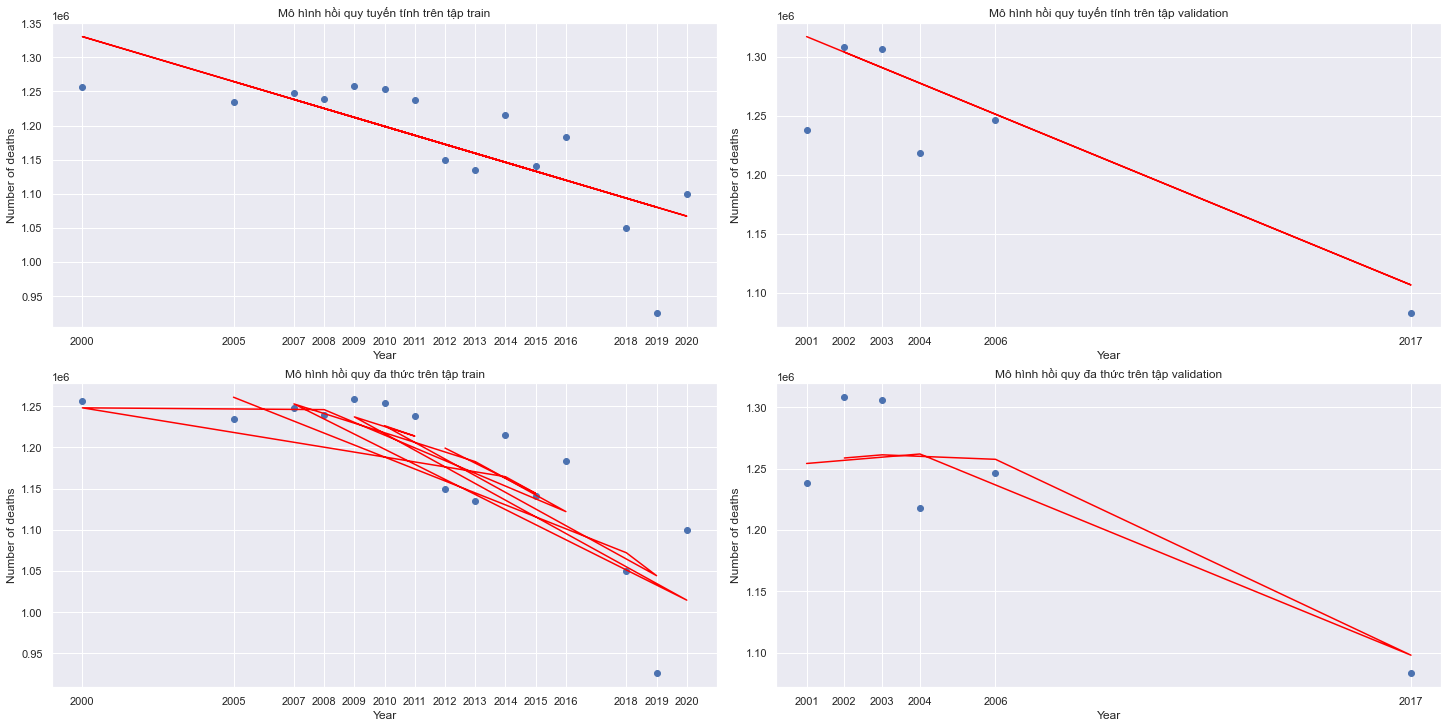

In [32]:
fig = plt.figure(figsize = (20, 10), constrained_layout = True)

import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2, figure = fig)
ax = [fig.add_subplot(gs_i) for gs_i in gs]

ax[0].scatter(x=X_train, y=y_train)
ax[0].plot(X_train, line_regr.predict(X_train), color='red')
ax[0].set_xticks(X_train)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of deaths')
ax[0].set_title('Mô hình hồi quy tuyến tính trên tập train')

ax[1].scatter(x=X_validation, y=y_validation)
ax[1].plot(X_validation, line_regr.predict(X_validation), color='red')
ax[1].set_xticks(X_validation)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of deaths')
ax[1].set_title('Mô hình hồi quy tuyến tính trên tập validation')

ax[2].scatter(x=X_train, y=y_train)
ax[2].plot(X_train, poly_regr.predict(poly_X_train), color='red')
ax[2].set_xticks(X_train)
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Number of deaths')
ax[2].set_title('Mô hình hồi quy đa thức trên tập train')

ax[3].scatter(x=X_validation, y=y_validation)
ax[3].plot(X_validation, poly_regr.predict(poly_X_validation), color='red')
ax[3].set_xticks(X_validation)
ax[3].set_xlabel('Year')
ax[3].set_ylabel('Number of deaths')
ax[3].set_title('Mô hình hồi quy đa thức trên tập validation')

plt.show()

**MSE** là giá trị trung bình của chênh lệch bình phương giữa tham số dự đoán và tham số quan sát được. Còn **RMSE** được tính bằng căn bậc hai của **MSE**.
Một giá trị **MSE** (hoặc **RMSE**) càng bé thì có nghĩa là những giá trị ước lượng sẽ càng sát với giá trị thực và do đó: Một mô hình có **MSE** (**RMSE**) bé hơn sẽ là một mô hình tốt hơn.

Nếu dựa vào giá trị **MSE** ta có:

**MSE**("Mô hình hồi quy đa thức") < **MSE**("Mô hình hồi quy tuyến tính") nên "Mô hình hồi quy đa thức" tốt hơn "Mô hình hồi quy tuyến tính"

Nếu dựa vào giá trị **R Square** ta có:

**R Square**("Mô hình hồi quy đa thức") > **R Square**("Mô hình hồi quy tuyến tính") nên "Mô hình hồi quy đa thức" tốt hơn "Mô hình hồi quy tuyến tính"